# **Project 23: Concrete Compressive Strength Predictor**

***Pandas*** : *A powerful data manipulation and analysis library for Python, offering data structures like DataFrames.*

***Numpy*** : *A fundamental package for numerical computations in Python, providing support for arrays and matrices.*

***Matplotlib*** : *A versatile plotting library for creating static, animated, and interactive visualizations in Python.*

***Seaborn*** : *A statistical data visualization library based on matplotlib, providing attractive and informative statistical graphics.*

***Warnings*** : *A built-in Python module for issuing warning messages to alert the programmer about potential issues in the code.*

# **Data Loading**

**We import these libriares for Data Loading, Data Cleaning, Data Visualization and EDA(Explorotory Data Analysis).**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

**Suppresses all warning messages during the execution of the script.**

In [2]:
warnings.simplefilter("ignore")

**Reads the 'concrete_data.csv' file into a pandas DataFrame and displays the first five rows.**

In [3]:
df = pd.read_csv("concrete_data.csv")
df.head(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Returns the dimensions of the DataFrame as a tuple, indicating the number of rows and columns.**

In [4]:
df.shape

(1030, 9)

**Provides a summary of the DataFrame, including the index, column names, non-null counts, and data types.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


**Calculates and displays the total number of missing (null) values in each column of the DataFrame.**

In [6]:
df.isnull().sum()

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
concrete_compressive_strength,0


# **Data Visualization**

**Defines a function to plot the distribution of a specified column using a boxplot and iterates over each column in the DataFrame to display its distribution and a separator line.**

**In these graphs, we analyze outliers in each column by using Seaborn's boxplot function. This helps us identify any anomalies or unusual values in the dataset.**

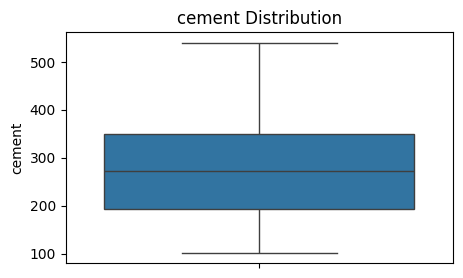

************************************************************


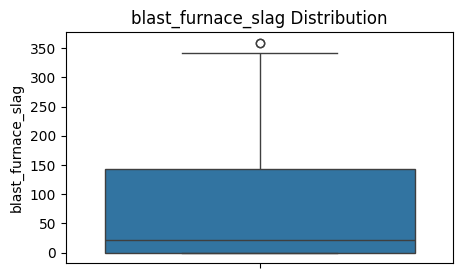

************************************************************


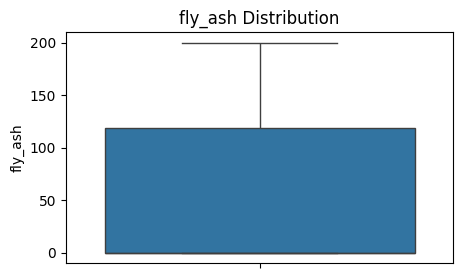

************************************************************


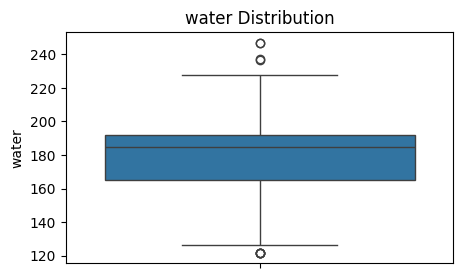

************************************************************


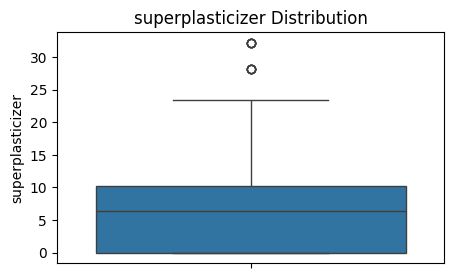

************************************************************


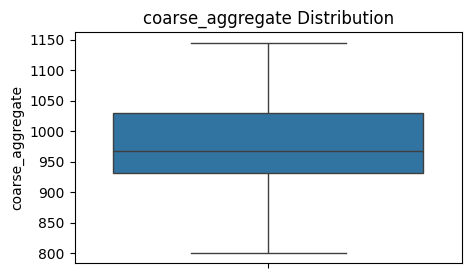

************************************************************


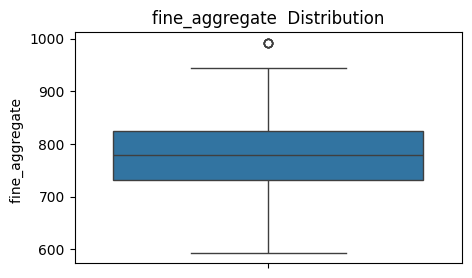

************************************************************


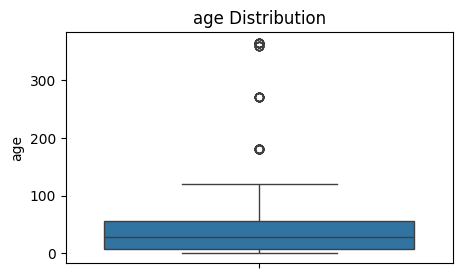

************************************************************


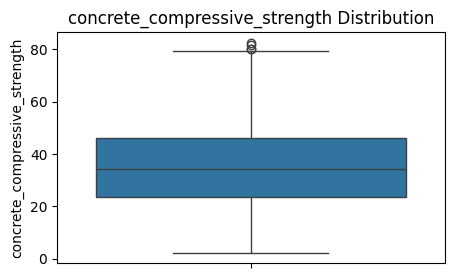

************************************************************


In [7]:
def outlier(data, column):
    plt.figure(figsize=(5, 3))
    sns.boxplot(data[column])
    plt.title("{} Distribution".format(column))
    plt.show()
    print("*" * 60)

for i in df.columns:
    outlier(df, i)

**Filters the DataFrame to exclude rows where specific columns exceed given threshold values for blast_furnace_slag, water, superplasticizer, and age.**

In [8]:
df=df[df["blast_furnace_slag"]<350]
df=df[(df["water"]<246) & (df["water"]>122)]
df=df[df["superplasticizer"]<25]
df=df[df["age"]<150]

**Plots a heatmap of the correlation matrix for the DataFrame, with annotations and a color map to visualize relationships between variables.**

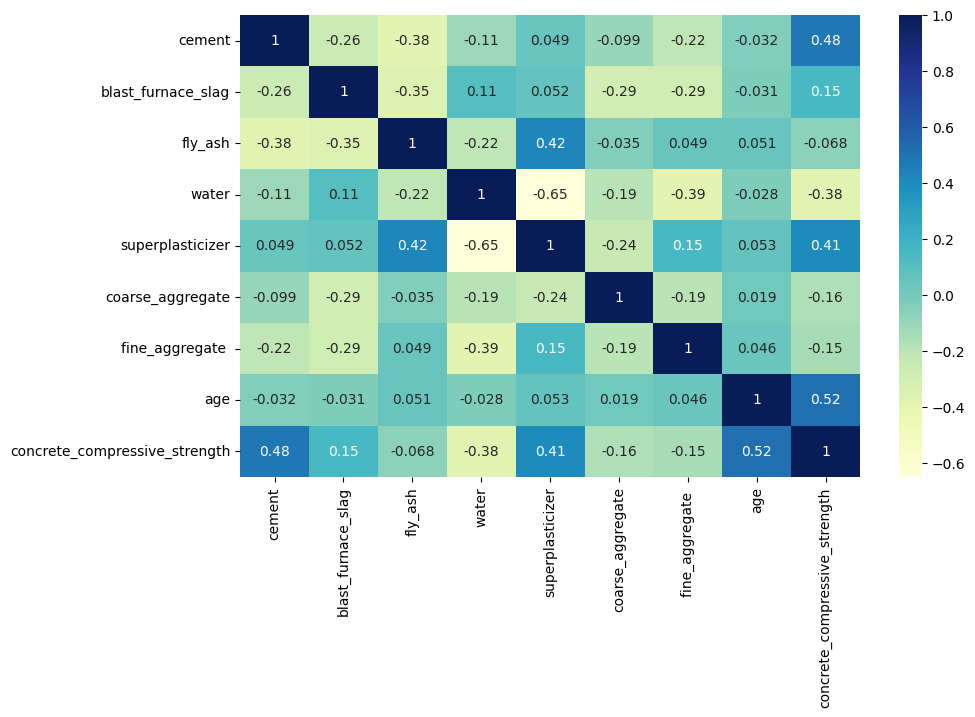

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Drops the specified columns from the DataFrame and displays the first five rows of the updated DataFrame.**

In [10]:
df.drop(["blast_furnace_slag"],axis=1,inplace=True)
df.drop(["coarse_aggregate"],axis=1,inplace=True)
df.drop(["fine_aggregate "],axis=1,inplace=True)

df.head(5)

,cement,fly_ash,water,superplasticizer,age,concrete_compressive_strength
0,540.0,0.0,162.0,2.5,28,79.99
1,540.0,0.0,162.0,2.5,28,61.89
5,266.0,0.0,228.0,0.0,90,47.03
7,380.0,0.0,228.0,0.0,28,36.45
8,266.0,0.0,228.0,0.0,28,45.85


**Lists the names of the remaining columns in the DataFrame after dropping the specified ones.**

In [11]:
df.columns

Index(['cement', 'fly_ash', 'water', 'superplasticizer', 'age',
       'concrete_compressive_strength'],
      dtype='object')

# **Model Building**

**Defines X as the feature set containing selected columns and y as the target variable containing the concrete_compressive_strength column.**

In [12]:
X = df[['cement', 'fly_ash', 'water', 'superplasticizer', 'age']]

y = df[["concrete_compressive_strength"]]

**Scales the features X and target y using MinMaxScaler to normalize their values between 0 and 1, with the output format set to pandas DataFrames.**

In [13]:
from sklearn.preprocessing import MinMaxScaler

Scaler_X = MinMaxScaler().set_output(transform = "pandas")

X = Scaler_X.fit_transform(X)

Scaler_y = MinMaxScaler().set_output(transform = "pandas")

y = Scaler_y.fit_transform(y)

**Imports train_test_split for splitting data into training and testing sets, and mean_squared_error for evaluating the performance of regression models.**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Splits the scaled features and target data into training and testing sets, with 80% of the data used for training.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

**1: Model Initialization: Linear Regression model is initialized with fit_intercept=False and n_jobs=1.**

**2: Training: The model is trained using X_train and y_train.**

**3: Prediction: Predictions are made on the X_test data.**

**4: Evaluation: The Mean Squared Error (MSE) of the model is calculated and printed.**

**5: fit_intercept : Determines whether to include an intercept term in the model.**

**6: n_jobs : Specifies the number of CPU cores to use for computation; 1 means only one core is used.**


In [16]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=False, n_jobs = 1)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Linear Regression Mean Squared Error: ", MSE)

Linear Regression Mean Squared Error:  0.015773798437951275


**1: Model Initialization: RandomForestRegressor is initialized with 1000 estimators and a fixed random state of 42.**

**2: Training: The model is trained on X_train and y_train.**

**3: Prediction: Predictions are made using X_test.**

**4: Evaluation: The Mean Squared Error (MSE) of the model is calculated and displayed.**

**5: n_estimators : Number of trees in the forest; 1000 trees are used.**

**6: random_state : Seed for the random number generator to ensure reproducibility.**

In [17]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=1000, random_state=42)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Random Forest Mean Squared Error: ", MSE)

Random Forest Mean Squared Error:  0.005899623810705122


**1: Model Initialization: DecisionTreeRegressor is set with a minimum of 20 samples per split and a maximum depth of 100.**

**2: Training: The model is trained using X_train and y_train.**

**3: Prediction: Predictions are generated with X_test.**

**4: Evaluation: The Mean Squared Error (MSE) of the model is computed and printed.**

**5: min_samples_split : Minimum number of samples required to split an internal node; set to 20.**

**6: max_depth : Maximum depth of the tree; set to 100.**

In [18]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(min_samples_split=20, max_depth=100)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Decision Tree Mean Squared Error: ", MSE)

Decision Tree Mean Squared Error:  0.011333855443029105


**1: Model Initialization: SVR is configured with a linear kernel.**

**2: Training: The model is fitted using X_train and y_train.**

**3: Prediction: Predictions are made with X_test.**

**4: Evaluation: The Mean Squared Error (MSE) of the model is calculated and displayed.**

**5: kernel : Specifies the type of kernel function to use; linear indicates a linear kernel.**

In [19]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("SVR Mean Squared Error: ", MSE)

SVR Mean Squared Error:  0.01661854966649537


**1: Model Initialization: Lasso regression is initialized with an alpha value of 0.1.**

**2: Training: The model is trained using X_train and y_train.**

**3: Prediction: The model makes predictions using X_test.**

**4: Evaluation: The Mean Squared Error (MSE) of the Lasso model is calculated and printed.**

**5: alpha : Regularization parameter that controls the strength of the penalty applied to the coefficients; set to 0.1.**

In [20]:
from sklearn.linear_model import Lasso

Ls = Lasso(alpha=0.1)

Ls.fit(X_train, y_train)

y_pred = Ls.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Lasso Mean Squared Error: ", MSE)

Lasso Mean Squared Error:  0.04811843576075882


# **Conclusion:**

- **Linear Regression Mean Squared Error:  0.0157**
- **Random Forest Mean Squared Error:  0.0058**
- **Decision Tree Mean Squared Error:  0.0113**
- **SVR Mean Squared Error:  0.0166**
- **Lasso Mean Squared Error:  0.0481**


**After testing various models, including Linear Regression, Random Forest, Decision Tree, Support Vector Regression (SVR), and Lasso, the Random Forest Regressor (RFR) achieved the lowest Mean Squared Error of 0.0058. Thus, RFR is the best-performing model for this task.**

# **Save Model**

**This code serializes and saves the trained RFR model along with its feature and target scalers into binary pickle files so they can be loaded and reused later without retraining.**

In [22]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(RFR, file)

with open("Scaler_X.pickle", "wb") as file:
    pickle.dump(Scaler_X, file)

with open("Scaler_y.pickle", "wb") as file:
    pickle.dump(Scaler_y, file)